# Data analytics project


#### Lecturer name: Dr Lihi drai





*Made by: Uriel levy, Daniel tzumi, Dan sa'adya, Artem Goncharov*


**Introduction:**

We decided to do our project about meeting apps. we had few meeting apps and eventually we chose the the one that most fit for us that called "Lovoo". Our dataset contains female user profile infos and was gathered during spring 2015 (april, may). 

In [1]:
# MARKDOWN
# ![download.jpg](https://media.istockphoto.com/vectors/handwritten-typography-lettering-of-lets-go-isolated-on-white-vector-id1214291804?k=20&m=1214291804&s=612x612&w=0&h=GN18U0HhC3p2sOwbD_gld3ZUpkd4qsa2OKHodpxQRGY=)

![download.jpg](https://media.istockphoto.com/vectors/handwritten-typography-lettering-of-lets-go-isolated-on-white-vector-id1214291804?k=20&m=1214291804&s=612x612&w=0&h=GN18U0HhC3p2sOwbD_gld3ZUpkd4qsa2OKHodpxQRGY=)

In [2]:
!pip install wordcloud


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
# import os ### need it?
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from wordcloud import WordCloud, STOPWORDS

In [4]:
link='https://raw.githubusercontent.com/tema455/Project-1/main/lovoo_v3_users_api-results%20(1).csv'
df=pd.read_csv(link)

# Data details:

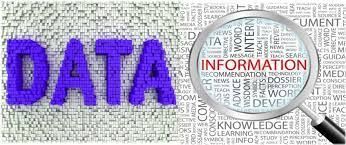

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3992 entries, 0 to 3991
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  3992 non-null   object 
 1   genderLooking           3992 non-null   object 
 2   age                     3992 non-null   int64  
 3   name                    3992 non-null   object 
 4   counts_details          3992 non-null   float64
 5   counts_pictures         3992 non-null   int64  
 6   counts_profileVisits    3992 non-null   int64  
 7   counts_kisses           3992 non-null   int64  
 8   counts_fans             3992 non-null   int64  
 9   counts_g                3992 non-null   int64  
 10  flirtInterests_chat     3992 non-null   bool   
 11  flirtInterests_friends  3992 non-null   bool   
 12  flirtInterests_date     3992 non-null   bool   
 13  country                 3992 non-null   object 
 14  city                    3706 non-null   

![download.gif](https://c.tenor.com/H7aFDoovJt8AAAAd/goals-us.gif)

# Number of users by age:

In [6]:
df['age'].value_counts()

22    721
21    612
23    596
24    534
20    530
19    523
25    356
26    117
28      1
18      1
27      1
Name: age, dtype: int64

#### We can see that for certain ages theres only one user, then were decided to normalize the data by dropping them, so it won't influence our Statistics.

In [7]:
df = df[(df['age'] < 27) & (df['age'] != 18)]

# Grapf 1              

#### 'Spearman' method used since there's binarri values in the data.         

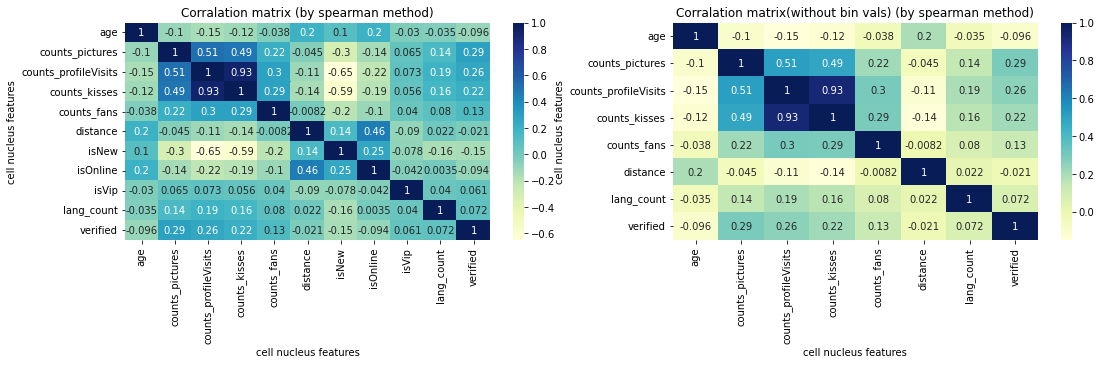

In [8]:
method = 'spearman'
corr_columns_1 = ['age', 'counts_pictures','counts_profileVisits' , 'counts_kisses' , 'counts_fans',
                'distance', 'isNew', 'isOnline','isVip','lang_count', 'verified']

corr_columns_2=['age', 'counts_pictures','counts_profileVisits' , 'counts_kisses' , 'counts_fans',
                'distance', 'lang_count', 'verified']

plt.figure(figsize=(18,4))
plt.subplot(1,2,1)
sns.heatmap(df[corr_columns_1].corr(method),annot = True,cmap = 'YlGnBu')
plt.title(f'Corralation matrix (by {method} method)')
plt.xlabel("cell nucleus features")
plt.ylabel("cell nucleus features")
plt.subplot(1,2,2)
sns.heatmap(df[corr_columns_2].corr(method),annot = True,cmap = 'YlGnBu')
plt.title(f'Corralation matrix(without bin vals) (by {method} method)')
plt.xlabel("cell nucleus features")
plt.ylabel("cell nucleus features")
plt.show()

# corralation conclusions:

 • Very strong positive connection between **counts_kisses & counts_profileVisits** (0.93). The connection can explained by the fact that those users who liked this profile were probably visit him before.

 • Strong positive connection between **counts_profileVisits & counts_pictures** (0.51). It can explained by the fact that users whom upload more pictures are considered more atrractive then others, which represent with more hits to their profiles. In addition, because of the connection wev'e mention earlier there's a high corralation between **counts_kisses & counts_pictures** (0.49) also.  That means that the chance of getting like by others is higher as if a profile has more pictures.

• Strong negative connection between **isNew & counts_profileVisits** (-0.65). That means that as long a profile is new it has lower hits. It might suggest that new users has no expirience with the app, and by that, perhaps, they tend to made more mistakes then expirience ones In addition, we can see that the connecion between **isNew & counts_kisses/counts_pictures** also strong negative (-0.59,-0.3).
so when profile isNew he have no expirient so he doesnt upload pictures and that why he does'nt get likes,and others dont visit is profile.

In [9]:
# # Graph 2            TITLE

In [10]:
df.whazzup.isna().sum()

1592

In [11]:
whazzupd_dropNA = df.whazzup.dropna()

In [12]:
#Here we'r droping out girls without any bio, and that's not a small number.       RAW

In [13]:
# # try to group same words:

# grouped={
#     ('Hund','hund','hunde','dog','dogs','chienne','chien','chiennes','chiens','cagna','cane','cagne','cani','perra','perro','perras','perros','cadela','cachorro','cadelas','cachorros':'dog',
#         ('chatte','chat','chattes','chats','Katze','Katzen','gatta','gatto','gatte','gatti','gata','gato','gatas','gatos','cat','cats');'cat',
#         ('bière','bières','bier','biere','birra','birre','cerveza','cervezas','cerveja','cervejas','beer'):'beer'}

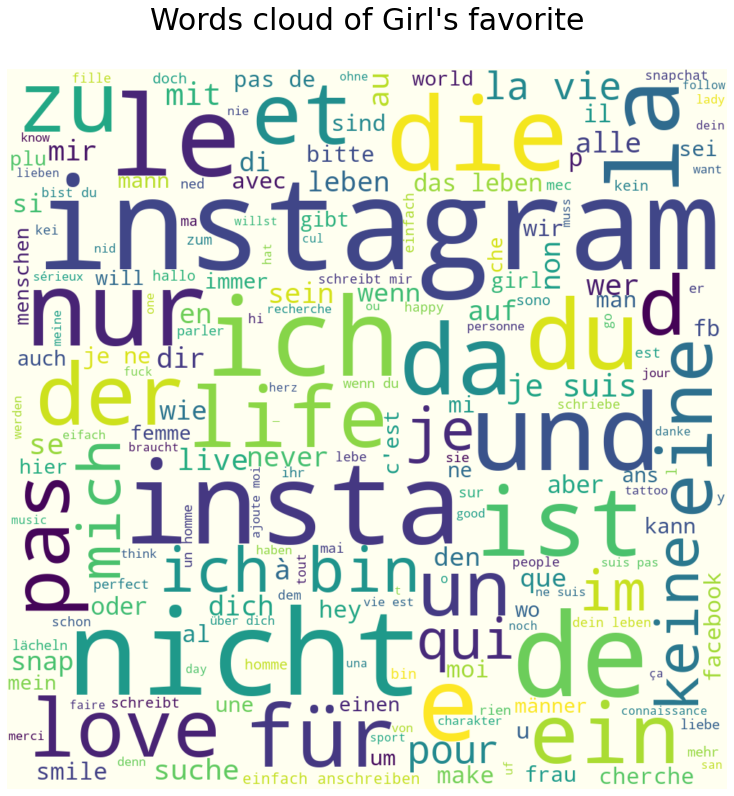

In [14]:
comment_words = ''
stopwords = set(STOPWORDS)
for words in whazzupd_dropNA:
     
    words = str(whazzupd_dropNA)
 
    tokens = words.split()
     
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words = ' '.join(whazzupd_dropNA).lower()

wordcloud = WordCloud(width = 1000, height = 1000,
                background_color ='#FFFFF0',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
                    
plt.figure(figsize = (10, 10), facecolor = 'None')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title('Words cloud of Girl\'s favorite\n', fontsize = 30)
plt.show()


In [15]:
# a lot of brain fuck that we can learn from it! go go kadima taimanim!!





In [16]:
# ![download.gif](https://c.tenor.com/NgDB2XehD4AAAAAC/social-media.gif)
# social media markdown

![download.gif](https://c.tenor.com/NgDB2XehD4AAAAAC/social-media.gif)

> Блок с отступами



In [17]:
# graph 3

In [18]:
df2 = df
dummies = ['flirtInterests_chat','flirtInterests_friends', 'flirtInterests_date']

df2['Team No.'] = df2[dummies].cumsum(axis=1).ne(1).sum(axis=1)

In [20]:
df2['count'] = df2[dummies].sum(axis=1)
df2_one_p = df2[df2['count'] == 1]
df2_one_p['Team No.'] = df2_one_p[dummies].cumsum(axis=1).ne(1).sum(axis=1)
# df2_one_p

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


***
## Team's numbers describe the interest of the person, what she is looking for:


*   Chat=0
*   Friends=1
*   Date=2




***

In [ ]:
target = 'flirtInterests_friends' # ['flirtInterests_chat','flirtInterests_friends', 'flirtInterests_date'] for onother data group check*
df2_one_p[[target,'Team No.']][df2_one_p[target] == True]
chat = 0
friends = 1
date = 2
df2_one_p[['flirtInterests_chat','Team No.']]

,flirtInterests_chat,Team No.
2,False,2
4,True,0
6,False,1
12,True,0
14,False,2
...,...,...
3984,True,0
3987,False,2
3989,False,1
3990,False,1


<Figure size 144x360 with 0 Axes>

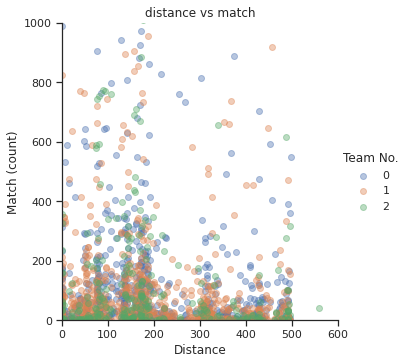

In [ ]:

plt.figure(figsize=(2,5))
sns.lmplot(x='distance',y='counts_kisses',data=df2_one_p,hue='Team No.',fit_reg=False,scatter_kws={'alpha':0.4})
plt.title('distance vs match')
plt.xlabel('Distance')
plt.ylabel('Match (count)')
plt.ylim(0,1000)
plt.xlim(0,600)

plt.show()

<Figure size 1440x1440 with 0 Axes>

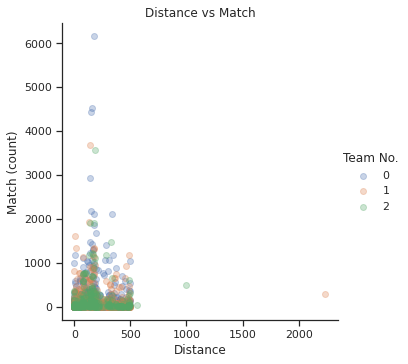

In [ ]:
  plt.figure(figsize=(20,20))
sns.lmplot(x='distance',y='counts_kisses',data=df2_one_p,hue='Team No.',fit_reg=False,scatter_kws={'alpha':0.3})
plt.title('Distance vs Match')
plt.xlabel('Distance')
plt.ylabel('Match (count)')

plt.show()

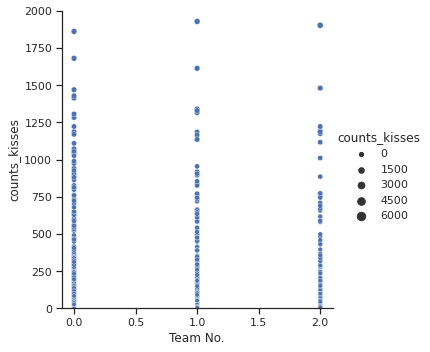

In [ ]:
fg=sns.relplot(data=df2_one_p, x='Team No.', y='counts_kisses',kind='scatter',size='counts_kisses').set(ylim=(0, 2000))

We can also see a little bit,a difference between the number of likes, that users got vs the goal of their explorering.  

In [ ]:
#  sns.relplot(data=df2_one_p, x='age', y='counts_kisses',kind='scatter',col='Team No.')

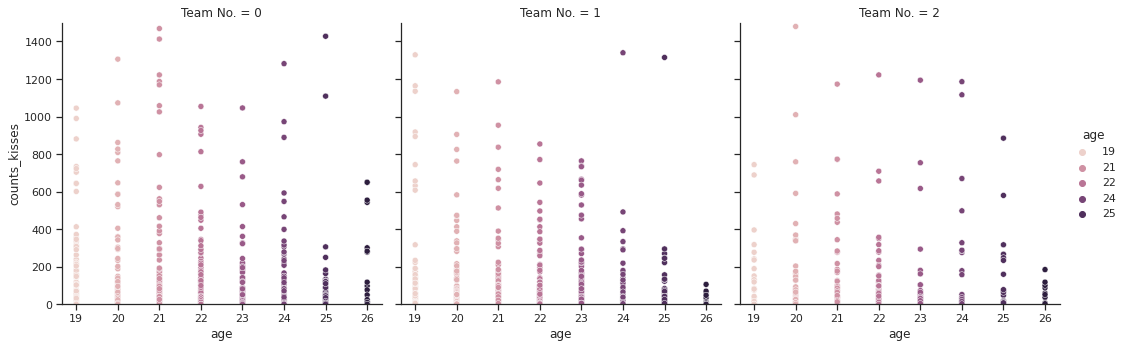

In [ ]:
 sns.relplot(data=df2_one_p, x='age', y='counts_kisses',kind='scatter',col='Team No.',hue='age').set(ylim=(0, 1500))
                                                                                                         

Here we can see that the age 21 is mostly looking for chatting matches. Also that there is no age influence in the dating interests. Should check also age-world cloud and i'm pretty sure, we will see most of 'insta' using around the 21 y.o.

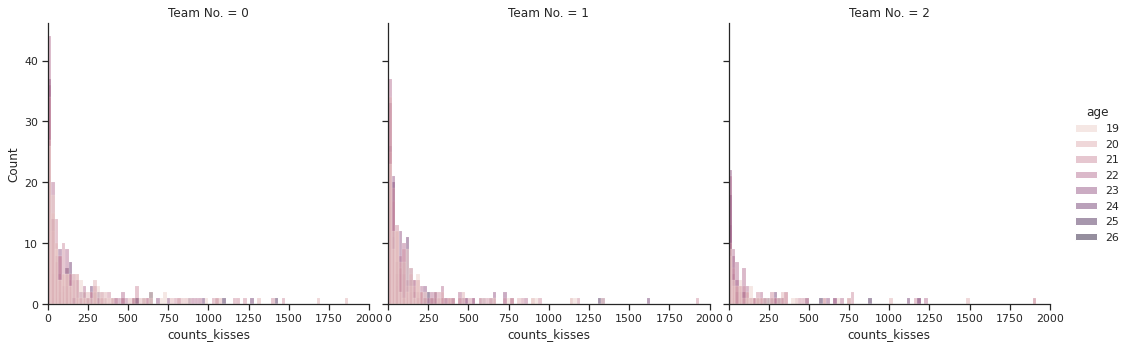

In [ ]:
sns.displot(data=df2_one_p, x='counts_kisses',kind='hist', hue='age',col='Team No.').set(xlim=(0, 2000))



Most influential age group in this episode also is the young users, so we can confidently stated that looking for "chatting" girls got most of likes and also retty sure they got there ig nam in theier bio, and this column is opened here... so talk with me, if u looking for new friends around Eroupa

![download.jpg](https://images02.military.com/sites/default/files/2021-04/chucknorris.jpeg)

Thanks for ur time and attention.